<a href="https://colab.research.google.com/github/venkatanadikatla/pytorch/blob/main/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [2]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
training_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

100%|██████████| 170498071/170498071 [00:10<00:00, 16100081.68it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [4]:
training_data

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               RandomHorizontalFlip(p=0.5)
               RandomCrop(size=(32, 32), padding=4)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [5]:
test_data

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               RandomHorizontalFlip(p=0.5)
               RandomCrop(size=(32, 32), padding=4)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [6]:
train_loader = DataLoader(training_data, batch_size = 64, shuffle = True)
test_loader = DataLoader(test_data, batch_size = 64, shuffle = False)

In [7]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

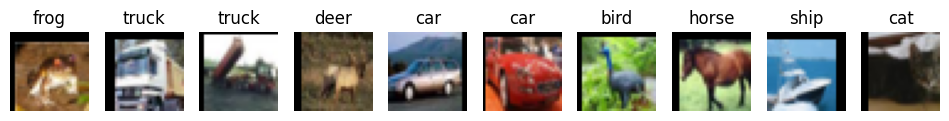

In [8]:

fig, axes = plt.subplots(1, 10, figsize=(12, 3))
for i in range(10):
    image = train_loader.dataset[i][0].permute(1, 2, 0)
    denormalized_image= image / 2 + 0.5
    axes[i].imshow(denormalized_image)
    axes[i].set_title(classes[train_loader.dataset[i][1]])
    axes[i].axis('off')
plt.show()


In [1]:
#Creating a class that instantiate a CNN module:
class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=3, out_channels = 64, kernel_size =3, padding=1)
    self.conv2 = nn.Conv2d(in_channels=64, out_channels = 128, kernel_size =3, padding=1)
    self.conv3 = nn.Conv2d(in_channels=128, out_channels = 256, kernel_size =3, padding=1)
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding =0)
    self.fc1 = nn.Linear(256*4*4, 512)
    self.fc2 = nn.Linear(512, 128)
    self.fc3 = nn.Linear(128, 10)
    self.relu = nn.ReLU()
    # self.dropout = nn.Dropout(0.5)


  def forward(self, X):
    X = self.pool(F.relu(self.conv1(X)))
    X = self.pool(F.relu(self.conv2(X)))
    X = self.pool(F.relu(self.conv3(X)))
    X = torch.flatten(X, 1)
    X = F.relu(self.fc1(X))
    # X = self.dropout(X)
    X = F.relu(self.fc2(X))
    X = self.fc3(X)



    return F.log_softmax(X, dim=1)





NameError: name 'nn' is not defined

In [ ]:
torch.manual_seed(42)
model = CNN()

In [ ]:
model

In [ ]:
#Loss Function Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)


In [ ]:
import time

start_time = time.time()
#Create variables to track things

epochs = 20
train_losses =[]
test_losses = []
train_accuracies =[]
test_accuracies = []

for epoch in range(epochs):
  model.train()
  running_loss, correct, total =0.0,0,0
  for images, labels in train_loader:
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
    _, predicted = torch.max(outputs.data,1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

  train_losses.append(running_loss/len(train_loader))
  train_accuracies.append(100*correct/total)


  model.eval()
  running_loss, correct, total = 0.0,0,0
  with torch.no_grad():
    for images, labels in test_loader:
      outputs = model(images)
      loss = criterion(outputs, labels)
      running_loss +=loss.item()
      _, predicted = torch.max(outputs.data,1)
      total += labels.size(0)
      correct += (predicted ==labels).sum().item()
  test_losses.append(running_loss/len(test_loader))
  test_accuracies.append(100*correct/total)

  print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.2f}, Val Acc: {test_accuracies[-1]:.2f}')


current_time = time.time()

total = current_time - start_time

print(f'Training Time: {total/60} Minutes')

In [ ]:
#epochs = 20, lr =0.001 came around 81% accuracy.
#epochs = 50, lr=0.001 came around   accuracy.
#epcochs = 20, lr=0.0001 came around accuracy.
#epochs =50, lr =0.0001 came around accuracy.